# Project: TMDb movie data analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project will be analyzing data associated with The Movie Database (TMDb) which contain information about 10,000 movies including user rating and revenue.

><h3>Question to be concluded after invistgating the dataset: </h3>
><ol>
  <li> Which genres are most popular from year to year?</li>
  <li> Which movie made the highest/lowest profit comparing the budget and revenue?</li>
  <li> Most Frequent star cast?</li>
  <li> Movies that the spectators liked the most (user voting)</li>
  <li> The most cooperation between a director and an actor</li>
    <li> The actor whose movies are most liked by the users </li>
    <li>Can we provide a list of directors that generates big revenue?</li>
</ol> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

After Observing the dataset and the questions related to this dataset for the analysis we will be keeping only relevent data and deleting the unused data

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Read the dataset using pandas
df = pd.read_csv('tmdb-movies.csv')

# Print the first row
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# View concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# View concise summery of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# count total rows in each column which contain null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# Check for duplicated rows
sum(df.duplicated())

1

In [7]:
# Check for movies with budget equal to 0
df[df['budget'] == 0].count()[0]

# There 5696 movies with budget equal to 0

5696

### Data Cleaning (Replace this with more specific notes!)

<b>1. Remove Duplicate Rows</b>

In [8]:
# Remove duplicated rows
df.drop_duplicates(inplace = True)

# Dropped the duplicated row
df.shape

(10865, 21)

<b>2. Changing Format Of Release Date Into Datetime Format</b>

In [9]:
# since the release date is provided as a string
#   we need to change it to date time

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<b>3. Remove the unused colums that are not needed in the analysis process</b>

In [10]:
# Drop The unused columns to make it easier to process the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

In [11]:
df.drop(['imdb_id','homepage','tagline','keywords','overview','budget_adj', 'revenue_adj'],axis =1,inplace = True)
df.shape

(10865, 14)

<b>4. Drop rows with null values</b>

In [12]:
df.dropna(inplace=True)
df.shape

(9772, 14)

<b>5. Drop rows with inappropriate values</b>
> While calculating profits of the movies, movies with zero budget which means that the values of those variables of those movies has not been recorded will lead to inappropriate results.

In [13]:
df[df['budget'] == 0].shape[0]
# Rows with budget equals to zero are too many to be dropped 

4751

<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year? 

In [14]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [15]:
# Extract movies genres into seperate list
genre_ = list(map(str,(df['genres'])))

# Create a set contains each genre
genre = set()

for gen in df['genres']:
    try:
        for i in gen.split('|'):
            genre.add(i.strip())
    except:
        genre.add(gen.strip())

# Map the release year and popularity into arrays using numpy
release_year = np.array(df['release_year'])
popularity = np.array(df['popularity'])

# Create a dataframe including genres and years
df_ = pd.DataFrame(index = genre, columns = range(1960,2016))
# The dataframe is created with genres as rows and years as columns

#Now fill the dataframe with the appropriate values
df_.fillna(value=0, inplace=True)
iyear = 0
for gen in genre_:
    
    try:
        for i in gen.split('|'):
            df_.loc[i, release_year[iyear]] = df_.loc[i, release_year[iyear]] + popularity[iyear]
    except:
        df_.loc[gen, release_year[iyear]] = df_.loc[gen, release_year[iyear]] + popularity[iyear]
        
    iyear+=1;

df_.head(5)
    


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,3.504904,4.603938,6.597594,5.099410,3.682157,3.490923,3.229519,7.144648,5.545733,3.744663,...,50.343171,49.919987,61.829781,80.880664,79.442817,67.809613,73.009720,82.634120,162.646744,225.546601
Crime,0.692959,1.613038,1.418448,2.209470,2.616900,0.774553,1.703508,3.768515,2.779596,2.844060,...,34.643475,44.288722,46.848532,28.100370,34.023169,42.042626,46.139227,64.146119,56.098463,86.753368
Drama,7.361967,6.915731,7.636277,4.191829,7.296370,6.100986,5.272672,8.183477,7.500178,6.368528,...,104.987378,105.026719,119.794378,122.043111,118.670920,122.409015,134.291997,161.962563,243.753099,239.150532
TV Movie,0.000000,0.000000,0.000000,0.000000,0.000000,0.600975,0.000000,0.000000,0.000000,0.528660,...,2.986828,0.711125,1.262595,2.356273,2.311888,4.015102,2.283443,2.511855,3.555117,3.645720
Mystery,0.000000,0.712793,1.036881,2.526197,1.232364,0.627611,1.409705,1.204227,6.077823,0.567962,...,23.450649,29.949474,17.291726,31.223592,34.810760,31.800380,15.655410,22.208263,36.364456,50.497379


#### The table consist of genre as rows, years as columns and the popularity of each genre in each year as cells

In [16]:
# For extra accurate results, we calculate the standard deviation
def std(x):
    return (x-x.mean())/x.std(ddof=0)
popular_df = std(df_)
popular_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.704728,1.299912,2.084791,1.353124,0.500825,1.076537,0.962463,1.762624,1.498228,1.068184,...,0.594621,0.479805,0.724198,0.955827,1.027982,0.584716,0.733674,0.713351,1.141942,1.576871
Crime,-0.653850,-0.141205,-0.202656,-0.076707,0.030998,-0.572724,-0.060937,0.479358,0.158154,0.562026,...,0.067553,0.294667,0.274316,-0.434117,-0.213259,-0.057514,0.065591,0.315875,-0.275354,-0.020111
Drama,2.568251,2.413811,2.543541,0.904088,2.094857,2.661253,2.332676,2.157482,2.445072,2.542852,...,2.429128,2.291540,2.464855,2.039821,2.100018,1.945581,2.257340,2.418843,2.220812,1.733401
TV Movie,-0.988650,-0.918421,-0.829135,-1.169869,-1.123173,-0.678113,-1.203372,-0.953051,-1.188441,-0.739279,...,-0.995219,-1.138027,-1.094614,-1.112075,-1.079873,-1.005333,-1.024798,-1.009207,-0.974281,-0.976364
Mystery,-0.988650,-0.574973,-0.371181,0.079997,-0.579645,-0.661941,-0.257972,-0.495326,1.756002,-0.717190,...,-0.308210,-0.176763,-0.613265,-0.351868,-0.191735,-0.312798,-0.692330,-0.585752,-0.537854,-0.437280


#### The same table as pervious cell but applying standard deviation to each cell 

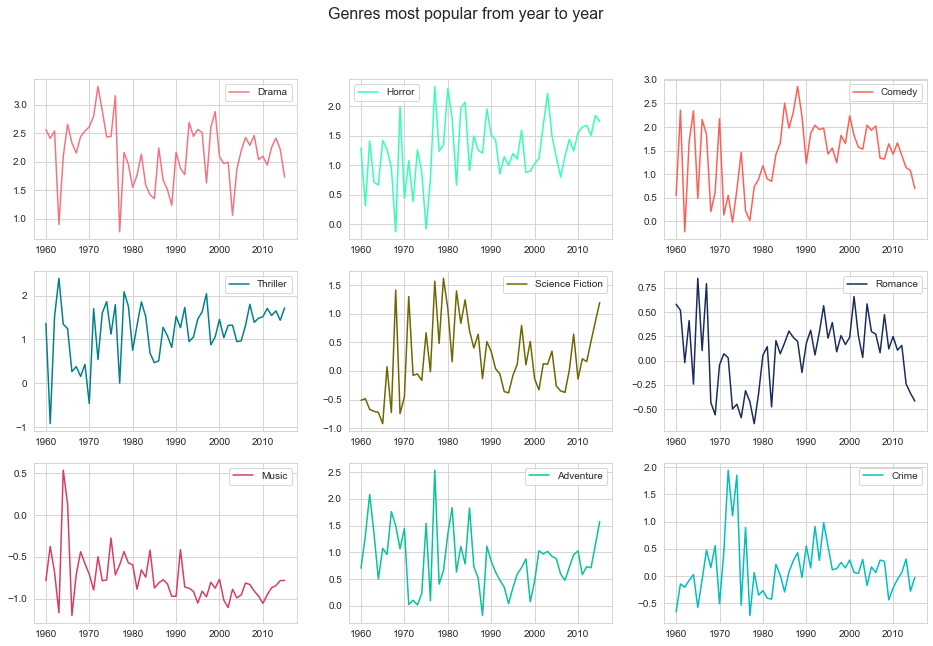

In [17]:
#How the popularity of the genre differ year by year.
sns.set_style("whitegrid")
#make a subplot of size 3,3.
fig, ax = plt.subplots(3,3,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genres most popular from year to year',fontsize = 16)
popular_df.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)
popular_df.loc['Action'].plot(label = "Horror",color='#33FFB5',ax = ax[0][1],legend=True)
popular_df.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)
popular_df.loc['Thriller'].plot(label = "Thriller",color='#00818a',ax = ax[1][0],legend=True)
popular_df.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = ax[1][1],legend=True)
popular_df.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_df.loc['Music'].plot(label = "Music",color='#db3b61',ax = ax[2][0],legend=True)
popular_df.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = ax[2][1],legend=True)
popular_df.loc['Crime'].plot(label = "Crime",color='c',ax = ax[2][2],legend=True)

### Each Graph represent the popularity of the genre from 1960 to 2016 we can see the peak of each genre

### Which movie made the highest/lowest profit comparing the budget and revenue?

In [18]:
# Create a new columns with the profit
df['profit'] = df['revenue'] - df['budget']

id_max = df['profit'].idxmax()
id_min = df['profit'].idxmin()

print('The movie {0}, made the highest profit of {1}'.format(df.loc[id_max]['original_title'], df.loc[id_max]['profit']))
print('The movie {0}, made the highest loss of {1}'.format(df.loc[id_min]['original_title'], df.loc[id_min]['profit']))

The movie Avatar, made the highest profit of 2544505847
The movie The Warrior's Way, made the highest loss of -413912431


Text(0, 0.5, 'Original title')

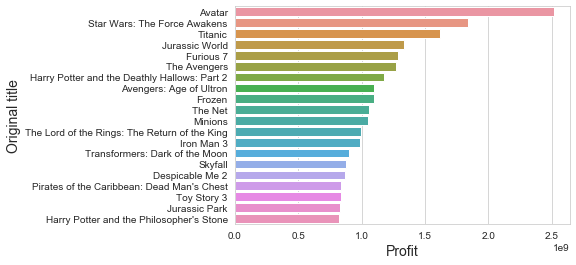

In [19]:
# Subtracting the mean from each profit to be easily visualized
df['profit'] = df['profit'] - df['profit'].mean()

# Plotting the first 20 movies in the dataset
df_ = df[['original_title', 'profit']].sort_values(by='profit', ascending=False)[:20]
sns.barplot(x=df_['profit'],y=df_['original_title'])
plt.xlabel('Profit', fontsize=14)
plt.ylabel('Original title', fontsize=14)

#### Which movie made the highest/lowest profit comparing the budget and revenue PLOT
> The plot shows the highest profitable movie <br>
> From the plot we can see that avatar is on the first spot

### Most Frequent star cast?

Text(0, 0.5, 'Actor')

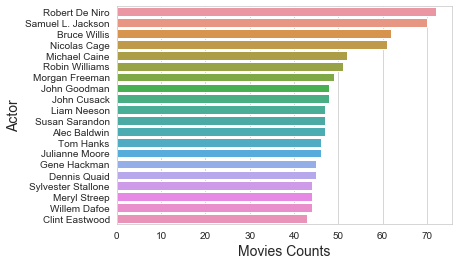

In [20]:
actors_dict = {}

# Count the number of movies each actor has rolled in
for cast in df['cast']:
    for actor in cast.split('|'):
        if actor in actors_dict:
            actors_dict[actor] += 1
        else:
            actors_dict[actor] = 1

# Convert dictionary into dataframe and take the first 20 most frequent actor to be easily visualized
df_ = pd.DataFrame.from_dict(actors_dict, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)[:20]
# Make the actors name to be a column rather than an index
df_ = df_.rename_axis('Actor').reset_index()

#Plot
sns.barplot(x=df_['Count'], y=df_['Actor'])
plt.xlabel('Movies Counts', fontsize=14)
plt.ylabel('Actor', fontsize=14)

###### Most Frequent star cast PLOT
> The plot visualize the top actors that was a part of a movie<br>
> We can see that Robert De Niro is on the first spot with more than 70 movies

### Movies that the spectators liked the most (user voting)

Text(0, 0.5, 'Movie')

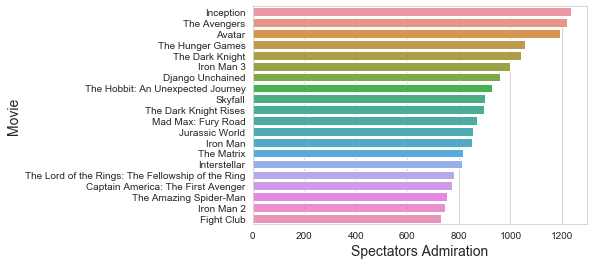

In [21]:
# Dividing the number of voter to the vote average, to avoid movie with high rating with very low number of voters
df['spectators_admiration'] = (df['vote_count'] / df['vote_average'])
df_ = df[['original_title', 'spectators_admiration']].sort_values(by='spectators_admiration', ascending=False)[:20]
#Plot
sns.barplot(x=df_['spectators_admiration'], y=df_['original_title'])
plt.xlabel('Spectators Admiration', fontsize = 14)
plt.ylabel('Movie', fontsize=14)

<b> Movies that the spectators liked the most PLOT </b>
>The graph shows the top movies was liked by spectators<br>
>The x axis shows the movie title<br>
>The y axis is a ratio between the number of voters and the avearge vote<br>
>We can conclude that inception is the most liked movie

### Can we provide a list of directors that generates big revenue?

In [22]:
# Top 5 Director with the most movie directed in the data set
df['director'].value_counts().to_frame(name='No. of movie directed').head()

,No. of movie directed
Woody Allen,42
Clint Eastwood,34
Steven Spielberg,29
Martin Scorsese,26
Ridley Scott,23


##### Woody Allen directed the most movies while Steven Spielberg had the biggest revenue

In [23]:
# Create a set of directors name 
directors = set()

for director in df['director']:
    try:
        for i in director.split('|'):
            directors.add(i)
    except:
        directors.add(director)

# Convert set to dict to include revenue for each director
directors = dict.fromkeys(directors, 0)

# ADD revenue to each director
for revenue, director in zip(df['revenue'], df['director']):
    try:
        for i in director.split('|'):
            directors[i] += revenue
    except:
        directors[director] += revenue

# sort dict to descending order
dict(sorted(directors.items(), key=lambda item: item[1], reverse=True))

{'Steven Spielberg': 9048014691,
 'Peter Jackson': 6523244659,
 'James Cameron': 5841894863,
 'Michael Bay': 4917208171,
 'Christopher Nolan': 4167548502,
 'David Yates': 4154295625,
 'Robert Zemeckis': 3869690869,
 'Chris Columbus': 3851491668,
 'Tim Burton': 3782609685,
 'Ridley Scott': 3649996480,
 'J.J. Abrams': 3579169916,
 'Gore Verbinski': 3548779679,
 'Ron Howard': 3484471847,
 'Roland Emmerich': 3393325574,
 'George Lucas': 3316550893,
 'Sam Raimi': 3193820360,
 'Francis Lawrence': 3179979588,
 'Carlos Saldanha': 3176405922,
 'Lee Unkrich': 2975629324,
 'Joss Whedon': 2963463141,
 'Clint Eastwood': 2824871255,
 'Sam Mendes': 2713548809,
 'Pierre Coffin': 2671006832,
 'Andrew Adamson': 2606859447,
 'M. Night Shyamalan': 2452354930,
 'Eric Darnell': 2428812256,
 'Barry Sonnenfeld': 2340032223,
 'John Lasseter': 2232208025,
 'Shawn Levy': 2218587063,
 'Tom McGrath': 2205388064,
 'Brad Bird': 2182073263,
 'Steven Soderbergh': 2159381666,
 'Pete Docter': 2147867609,
 'David Fincher

<a id='conclusions'></a>
## Conclusions

> <ul>
  <li>Thriller movies was the most popular in the 60s</li>
  <li>Drama movies was the most popular in the 70s</li>
  <li>Comdey movies was the most popular in the 80s</li>
  <li>Drama movies was the most popular in the 90s</li>
  <li>Drama and science fiction movies was the most popular in the 2000s</li>
  <li>Avatar, Star Wars and Titanic are the most profitable movies</li>
  <li>Revenue is directly connected to the budget</li>
  <li>Robert De Niro is the actor with the heighest count of movies</li>
    <li>Inception, The Avengers, Avatar are most admired by spectators</li>
    <li>Steven Spielberg is the highest director that generates big revenue</li>
</ul>

## Limitation
> <ul>
  <li>During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.</li>
    <li>We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.<\li>
        <li>There was a lot of movies with budget equals to zero, I think that it's value was not recorded or was unknown</li>
</ul>